In [1]:
# import the necessary packages
from sklearn.preprocessing import LabelEncoder
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import pickle

In [2]:
boot_prc = pickle.load(open('boot_prc_03032023.pkl', 'rb'))
boot_report = pickle.load(open('boot_report_03032023.pkl', 'rb'))
groups = pickle.load(open('boot_groups_03032023.pkl', 'rb'))

In [3]:
cats = ['group1', 'group2']
lb = LabelEncoder()
cats = lb.fit_transform(cats)

In [4]:
plt.rcParams['font.size'] = 12

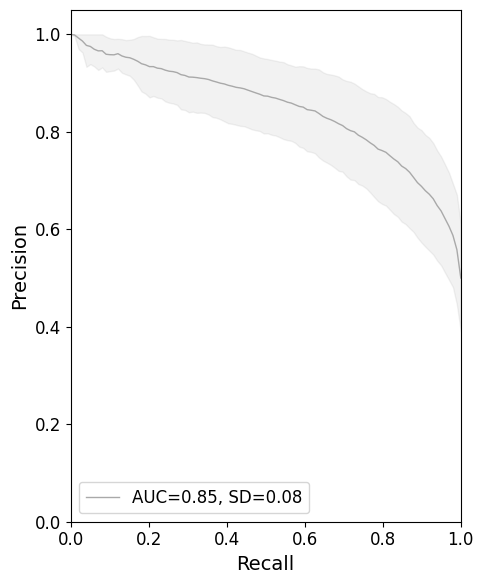

In [5]:
lw = 1
plt.figure(figsize=(5,6))
mean_recall = np.linspace(0, 1, 100)

a_prec = []
a_auc = []
for i in range(len(groups)):
    prcs = pd.concat(boot_prc[i])
    report = pd.concat(boot_report[i])
    for j in range(len(lb.classes_)):
        df = prcs[prcs["class"] == lb.classes_[j]]
        prec_fold = df['precision']
        recall_fold = df['recall']
        prec_fold = prec_fold[::-1]
        recall_fold = recall_fold[::-1]
        a_prec.append(np.interp(mean_recall, recall_fold, prec_fold))
        a_auc.append(np.mean(report.loc[lb.classes_[j]]['auprc']))
                 
mean_prec = np.mean(a_prec, axis=0)
std_prec = np.std(a_prec, axis=0)
prec_upper = np.minimum(mean_prec + std_prec, 1)
prec_lower = np.maximum(mean_prec - std_prec, 0)
plt.fill_between(mean_recall, prec_lower, prec_upper, color='gray', alpha=.1)


mean_auc = np.mean(a_auc)
std_auc = np.std(a_auc)
plt.plot(mean_recall, mean_prec, color='darkgrey',
         label='AUC={0:0.2f}, SD={1:0.2f}' ''.format(mean_auc, std_auc),
         lw=1)


plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('Recall', fontsize=14)
plt.ylabel('Precision', fontsize=14)
plt.legend(loc="lower left")
plt.tight_layout()
plt.savefig('performance_5CFV_AUPRC.png', dpi=300)
plt.show()